# Unit 4: The Risk Analyst

## Learning Outcomes

* Recalling the concept of probability as a measure of uncertainty.
* Explaining conditional probability using observed data.
* Applying empirical probability methods to estimate risk from real datasets.
* Analysing how probability changes when additional conditions are introduced.

## Introduction

In real life, we often make decisions when outcomes are uncertain. A doctor considers test results before advising treatment. A school plans transport based on past attendance. A farmer watches weather signals before sowing. In all such cases, we do not know the future for sure, but we can use probability to make decisions that are more informed.

In this unit, you will learn how to measure uncertainty using probability, and how extra information changes probability. This is called conditional probability. You will practise risk analysis using a real dataset that is included in scikit-learn. 
#### We will be estimating probabilities from observed data, therefore we are using an empirical approach to probability.

## Activity 4.1: Loading a Real Dataset for Risk Analysis

We will use a real classification dataset that comes with scikit-learn. It contains measurements of different properties of a set of samples.
Each sample belongs to one of three categories labelled as 0, 1, or 2.

In this unit, think of these categories as three groups, and we will calculate probabilities about which group a sample is likely to belong to.

In [16]:
from sklearn.datasets import load_wine
import pandas as pd

sample = load_wine()

df = pd.DataFrame(sample.data, columns=sample.feature_names)
df["class"] = sample.target

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


The dataset has many rows, so `head()` shows only the first 5 rows to help us preview the table without printing everything.

Let us check how many rows the dataset has.

In [6]:
len(df)

178

## Activity 4.2: Simple Probability from Data

Let us begin with a basic probability question.

If we randomly choose one sample from this dataset, what is the probability that it belongs to class 0.

In [7]:
total = len(df)
count_class0 = len(df[df["class"] == 0])

prob_class0 = count_class0 / total
prob_class0

0.33146067415730335

This is a simple probability based on counts in the dataset.

Now calculate the probabilities of all three classes.

In [8]:
df["class"].value_counts(normalize=True).sort_index()

class
0    0.331461
1    0.398876
2    0.269663
Name: proportion, dtype: float64

This gives the probability of each class in the dataset.

## Activity 4.3: Conditional Probability and Risk

Often, risk changes when we know additional information.

For example, suppose we know a sample has a high alcohol value. Does that change the chance that it belongs to a particular class.

We will treat this as a risk question:

What is the probability that a sample belongs to class 0 given that its alcohol is greater than a chosen threshold.

First, let us choose a threshold. We will start with 13.0.

In [9]:
threshold = 13.0

high_alcohol = df[df["alcohol"] > threshold]
len(high_alcohol), len(df)

(92, 178)

Now calculate the conditional probability.

In [10]:
prob_class0_given_high_alcohol = len(high_alcohol[high_alcohol["class"] == 0]) / len(high_alcohol)
prob_class0_given_high_alcohol

0.6195652173913043

Compare this with the overall probability of class 0 from Activity 4.2. If the conditional probability is higher, then high alcohol increases the likelihood of class 0 in this dataset. If it is lower, then high alcohol decreases it.

This is a simple form of risk analysis. We are analysing how risk changes when we add a condition.

## Activity 4.4: Comparing Risk Across Multiple Conditions

Now compare two different conditions and see how the probability changes.

Let us define two groups:

* samples with alcohol above 13.0
* samples with alcohol at or below 13.0

Then compare how likely class `0` is in each group.

In [11]:
low_or_equal_alcohol = df[df["alcohol"] <= threshold]

p0_high = len(high_alcohol[high_alcohol["class"] == 0]) / len(high_alcohol)
p0_low  = len(low_or_equal_alcohol[low_or_equal_alcohol["class"] == 0]) / len(low_or_equal_alcohol)

p0_high, p0_low

(0.6195652173913043, 0.023255813953488372)

If these probabilities are different, then alcohol level is affecting the risk of being in class 0.

We can also look at all classes under the same condition.

In [13]:
high_alcohol["class"].value_counts(normalize=True).sort_index()

class
0    0.619565
1    0.086957
2    0.293478
Name: proportion, dtype: float64

This shows how probability is distributed across classes when alcohol is high.

> **Learning Note**
>
> The function `value_counts()` is used to count how many times each category appears in a column.
> For example, it can count how many wines belong to class 0, class 1, and class 2.
>
> When we use `normalize=True`, the counts are converted into proportions.
> This means the values now represent **probabilities** instead of raw counts.
>
> The function `sort_index()` arranges the results in order of the class labels,
> so class 0, class 1, and class 2 appear in a clear sequence.
>
> Together,  
> `value_counts(normalize=True).sort_index()`  
> gives the probability of each category in an organised and readable form.
>
> These probabilities can also be visualised using a bar chart to compare risks visually.


### 📊 Optional Visualisation

You can include this short visualisation code right after the probability output.

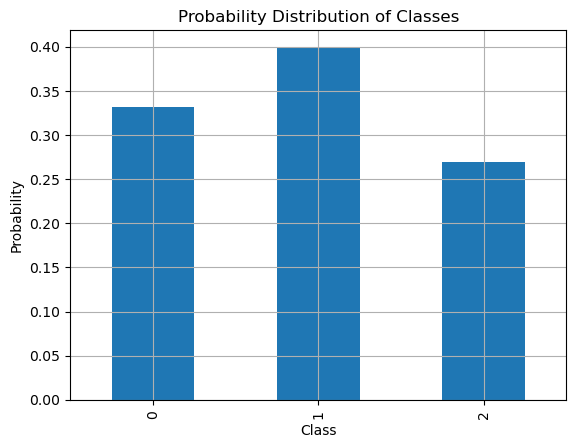

In [15]:
import matplotlib.pyplot as plt
df["class"].value_counts(normalize=True).sort_index().plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.title("Probability Distribution of Classes")
plt.grid(True)
plt.show()


* The height of each bar shows how likely each class is
* Taller bars mean higher probability
* This makes risk comparison easier to see than numbers alone

## Practice Tasks

Try the tasks below. Use clear steps and check your answers using the solutions.

1. Find the probability that a randomly chosen sample belongs to class 1.

In [17]:
len(df[df["class"] == 1]) / len(df)

0.398876404494382

2. Find the probability that a sample belongs to class 2 given that alcohol is greater than 13.0.

In [18]:
len(high_alcohol[high_alcohol["class"] == 2]) / len(high_alcohol)

0.29347826086956524

3. Change the threshold to 12.5 and repeat the conditional probability for class 0.

In [19]:
threshold2 = 12.5
high2 = df[df["alcohol"] > threshold2]

len(high2[high2["class"] == 0]) / len(high2)

0.48760330578512395

4. Choose another feature such as malic_acid and test a condition of your choice.

In [20]:
cond = df[df["malic_acid"] > 2.0]
len(cond[cond["class"] == 0]) / len(cond)

0.16666666666666666

5. Explain, using your results, how conditional probability helps in risk analysis.

> *Hint*: Conditional probability helps risk analysis because it measures probability after including extra information. This helps us compare risk across conditions, not just in the full dataset.

## Optional Advanced Exercise: Heat Risk Using Real Temperature Data

If you have internet access in your notebook environment, you can fetch real temperature data and estimate the probability of extreme heat days in a chosen period.

This exercise uses the Open-Meteo historical weather API.

In [30]:
import requests
import pandas as pd

# Choose your city coordinates (example: Delhi)
lat, lon = 28.6139, 77.2090

# Choose a date range (Use format YYYY-MM-DD)
start_date = "2020-05-01"
end_date   = "2025-06-30"

url = (
    "https://archive-api.open-meteo.com/v1/archive"
    f"?latitude={lat}&longitude={lon}"
    f"&start_date={start_date}&end_date={end_date}"
    "&daily=temperature_2m_max"
    "&timezone=Asia%2FKolkata"
)

data = requests.get(url, timeout=30).json()

df_temp = pd.DataFrame({
    "Date": data["daily"]["time"],
    "Tmax": data["daily"]["temperature_2m_max"]
})

df_temp.head(10)


,Date,Tmax
0,2020-05-01,38.4
1,2020-05-02,36.5
2,2020-05-03,34.7
3,2020-05-04,32.9
4,2020-05-05,34.4
5,2020-05-06,35.2
6,2020-05-07,35.8
7,2020-05-08,38.1
8,2020-05-09,39.5
9,2020-05-10,36.3


Now estimate the probability of a very hot day.

> **Learning Note**
>
> Column names in real datasets come from data providers.
> If a column name is not exactly correct, Python raises a KeyError.
> Always check column names using `df.columns` before using them.

In [32]:
df_temp.columns


Index(['Date', 'Tmax'], dtype='object')

In [34]:
threshold = 40
hot_days = (df_temp["Tmax"] > threshold).sum()
total_days = len(df_temp)

hot_days, total_days, hot_days / total_days

(151, 1887, 0.0800211976682565)

### Plotting Temperature Across Time

Once we have temperature data in a table, a graph helps us see patterns more clearly. A line plot is suitable here because temperature changes continuously over time.

> **Learning Note**
>
> When data is read from a file or an online source, dates are often stored as plain text.
> Even though they look like dates, the computer treats them as ordinary strings.
>
> The function `pd.to_datetime()` converts text that looks like a date into a true
> date–time format that Python understands.
>
> This conversion is important because:
> - Python can correctly arrange dates in order
> - graphs show time progressing smoothly from left to right
> - we can compare dates, find ranges, and study changes over time
>
> Without converting dates using `pd.to_datetime()`, plots may be incorrect
> or dates may not appear in the proper order.


We convert the Date column into a date–time format so that Python can treat time correctly while plotting and analysing trends.

In [35]:
df_temp["Date"] = pd.to_datetime(df_temp["Date"])
df_temp.head()


,Date,Tmax
0,2020-05-01,38.4
1,2020-05-02,36.5
2,2020-05-03,34.7
3,2020-05-04,32.9
4,2020-05-05,34.4


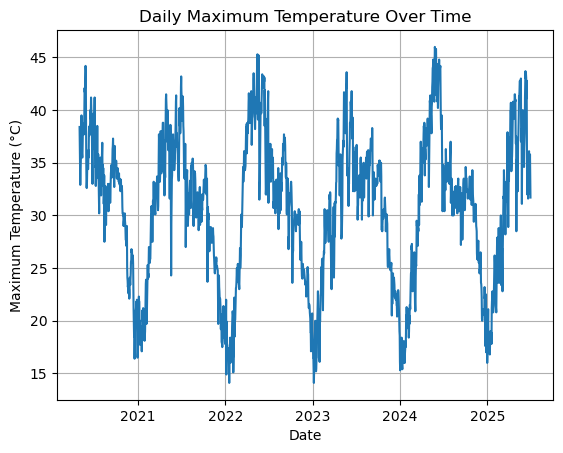

In [37]:
import matplotlib.pyplot as plt

plt.plot(df_temp["Date"], df_temp["Tmax"])
plt.xlabel("Date")
plt.ylabel("Maximum Temperature (°C)")
plt.title("Daily Maximum Temperature Over Time")
plt.grid(True)
plt.show()


## Reflection (Optional)

In this unit, you used real data to compute probabilities and conditional probabilities. You observed that risk changes when you add a condition, and that conditional probability gives more useful information than an overall probability.

Reflect on the following:

* How did probability help you describe uncertainty in the dataset
* How did the condition change the probability, and why
* Why is conditional probability more useful in decision making
* Where might a risk analyst use similar ideas in real life